# CoSaMP

Implementation of CoSaMP algorithm.

http://users.cms.caltech.edu/~jtropp/papers/NT08-CoSaMP-Iterative-preprint.pdf

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.optimize import minimize
from scipy.fftpack import dct, idct

plt.rcParams['figure.figsize'] = [12, 18]
plt.rcParams.update({'font.size': 18})

In [2]:
def cosamp(phi, u, s, epsilon=1e-10, max_iter=1000):
    """
    Return an `s`-sparse approximation of the target signal
    Input:
        - phi, sampling matrix
        - u, noisy sample vector
        - s, sparsity
    """
    a = np.zeros(phi.shape[1])
    v = u
    it = 0 # count
    halt = False
    while not halt:
        it += 1
        print("Iteration {}\r".format(it), end="")

        y = np.dot(np.transpose(phi), v)
        omega = np.argsort(y)[-(2*s):] # large components
        omega = np.union1d(omega, a.nonzero()[0]) # use set instead?
        phiT = phi[:, omega]
        b = np.zeros(phi.shape[1])
        # Solve Least Square
        b[omega], _, _, _ = np.linalg.lstsq(phiT, u)

        # Get new estimate
        b[np.argsort(b)[:-s]] = 0
        a = b

        # Halt criterion
        v_old = v
        v = u - np.dot(phi, a)

        halt = (np.linalg.norm(v - v_old) < epsilon) or \
            np.linalg.norm(v) < epsilon or \
            it > max_iter

    return a

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


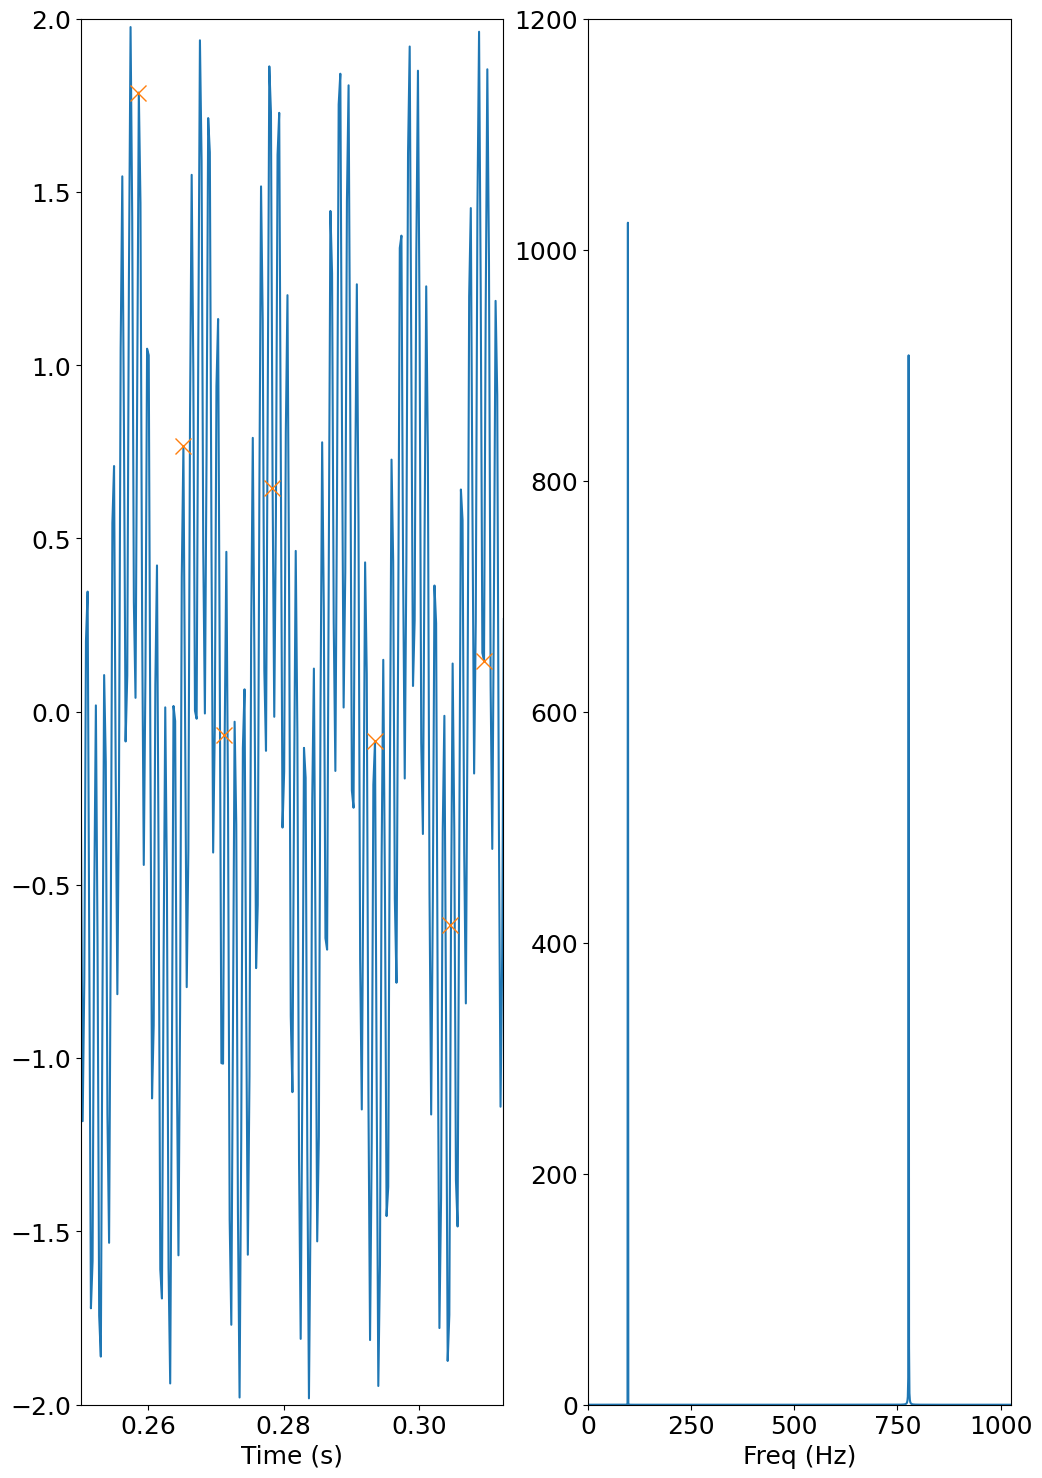

In [36]:
n = 4096
t = np.linspace(0,1,n)
x = np.cos(2 * 97 * np.pi * t) + np.cos(2 * 777 * np.pi * t)

xt = np.fft.fft(x)
PSD = xt * np.conj(xt) / n

p = 128
perm = np.floor(np.random.rand(p) * n).astype(int)
y = x[perm]

time_window = np.array([1024,1280]) / 4096
freq = np.arange(n)
L = int(np.floor(n/2))

fig, axs = plt.subplots(1,2)
axs = axs.reshape(-1)

axs[0].plot(t,x)
axs[0].plot(perm/n, y,'x', ms=12)
axs[0].set_xlim(time_window[0], time_window[1])
axs[0].set_ylim(-2,2)
axs[0].set_xlabel('Time (s)')

axs[1].plot(freq[:L], PSD[:L])
axs[1].set_xlim(0,1024)
axs[1].set_ylim(0,1200)
axs[1].set_xlabel('Freq (Hz)')

plt.show()

In [37]:
psi = dct(np.identity(n))
theta = psi[perm,:]

s = cosamp(theta, y, 10, epsilon=1.e-10, max_iter=10)
x_recon = idct(s)

<ipython-input-2-0ecaa456d98a>:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b[omega], _, _, _ = np.linalg.lstsq(phiT, u)


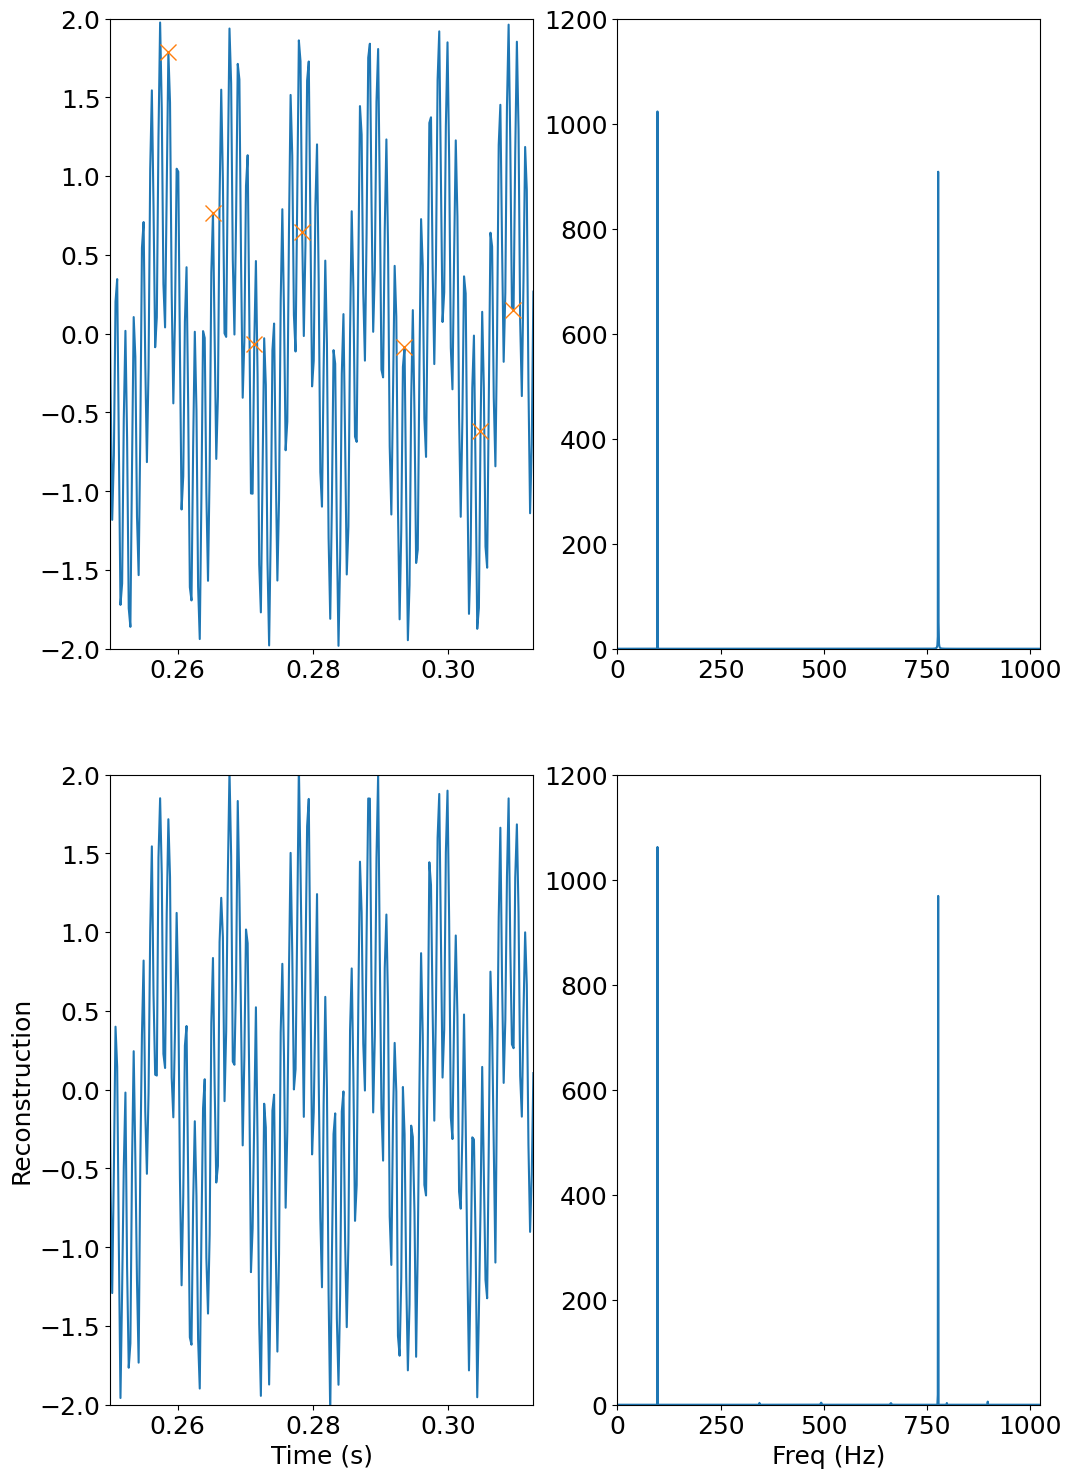

In [38]:
fig, axs = plt.subplots(2,2)
axs = axs.reshape(-1)

axs[0].plot(t,x)
axs[0].plot(perm/n, y,'x', ms=12)
axs[0].set_xlim(time_window[0], time_window[1])
axs[0].set_ylim(-2,2)
axs[2].set_ylabel('Original')

axs[1].plot(freq[:L], PSD[:L])
axs[1].set_xlim(0,1024)
axs[1].set_ylim(0,1200)

axs[2].plot(t,x_recon)
axs[2].set_xlim(time_window[0], time_window[1])
axs[2].set_ylim(-2,2)
axs[2].set_xlabel('Time (s)')
axs[2].set_ylabel('Reconstruction')

xt_recon = np.fft.fft(x_recon,n)
PSD_recon = xt_recon * np.conj(xt_recon)/n

axs[3].plot(freq[:L], PSD_recon[:L])
axs[3].set_xlim(0,1024)
axs[3].set_ylim(0,1200)
axs[3].set_xlabel('Freq (Hz)')

plt.show()

(0.0, 1024.0)

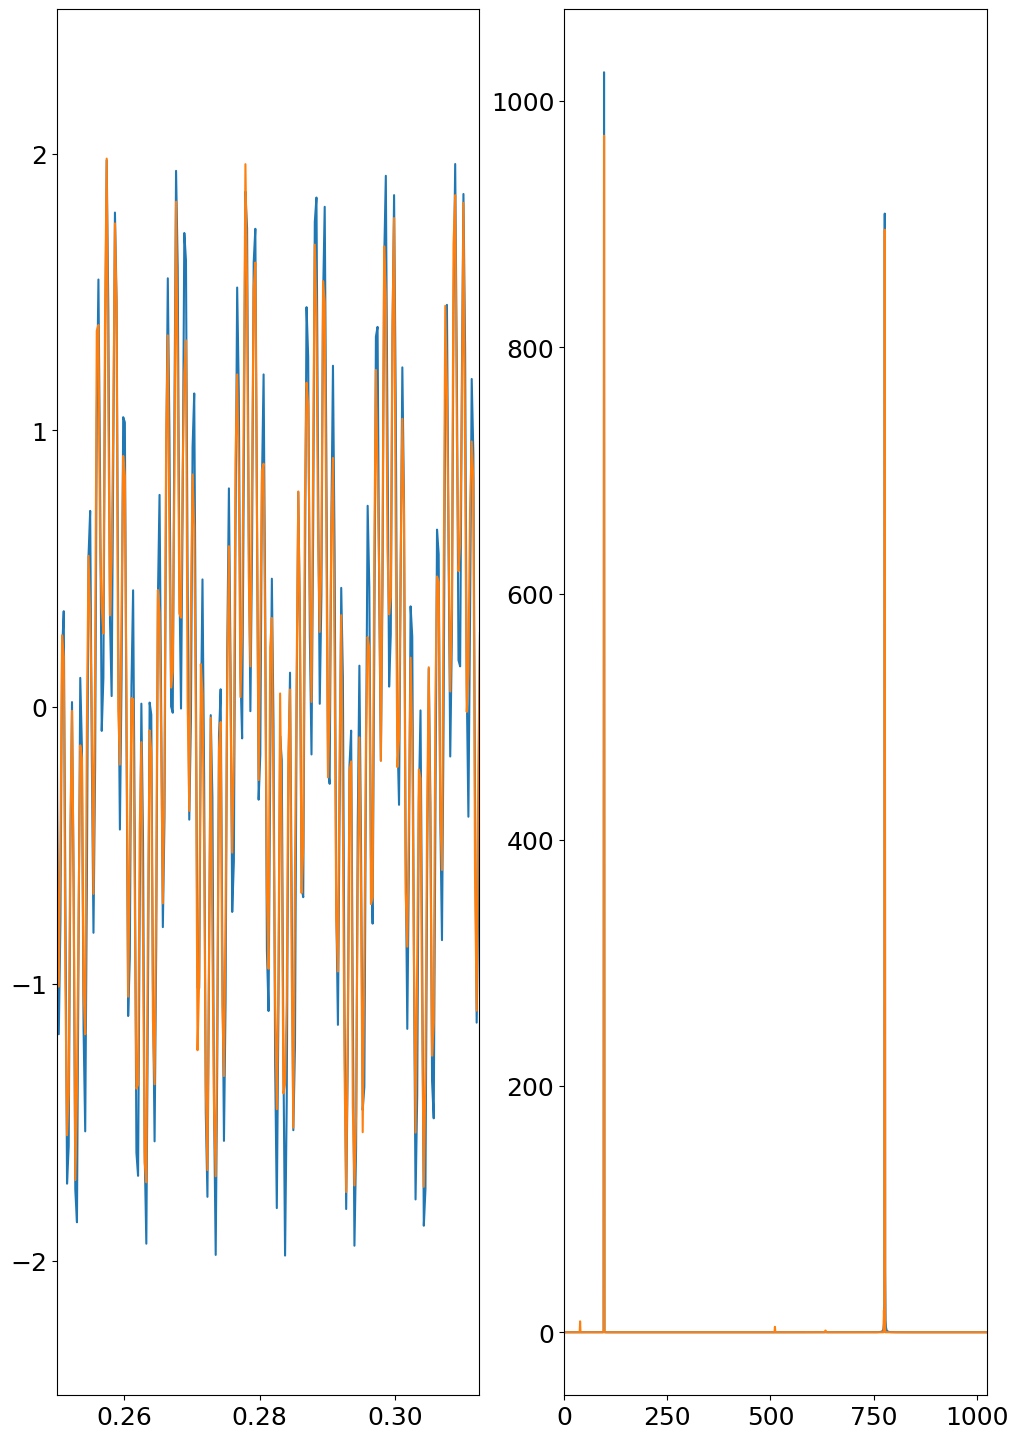

In [28]:
fig, axs = plt.subplots(1,2)
axs = axs.reshape(-1)

axs[0].plot(t,x)
axs[0].plot(t,x_recon)
axs[0].set_xlim(time_window[0], time_window[1])

axs[1].plot(freq[:L], PSD[:L])
axs[1].plot(freq[:L], PSD_recon[:L])
axs[1].set_xlim(0,1024)